# **University of Kurdistan**
### Assignment 2: Data Cleaning & Analysis
### Course: Data Mining  
### Tasks: Duplicates, Missing Values, Outliers, etc.

### A. Identify and Remove Duplicate or Redundant Columns
### In this step, we detect columns that are exact duplicates or represent the same data, then remove them to avoid redundancy.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/loan_dataset.csv')
df.columns = df.columns.str.strip()  # Clean column names

print("Initial dataset shape:", df.shape)

# Detect exact duplicate columns
duplicate_cols = df.columns[df.T.duplicated()]
print("Duplicate columns detected:", list(duplicate_cols))

# Remove exact duplicate columns
df = df.loc[:, ~df.T.duplicated()]

print("Dataset shape after removing duplicate columns:", df.shape)


Initial dataset shape: (4269, 13)
Duplicate columns detected: []
Dataset shape after removing duplicate columns: (4269, 13)


### B. Identify and Remove Duplicate Rows
### Remove rows that are complete duplicates to avoid skewing analysis.


In [3]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

df = df.drop_duplicates()

print("Dataset shape after removing duplicate rows:", df.shape)


Number of duplicate rows: 0
Dataset shape after removing duplicate rows: (4269, 13)


### C. Handle Missing Values by Deleting Rows or Columns
### Here, we drop columns with too many missing values and rows with any missing values to see how much data is lost.


In [4]:
print("Missing values per column before handling:")
print(df.isnull().sum())

# Drop columns with more than 50% missing data
threshold = len(df) * 0.5
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(columns=cols_to_drop)
print("Dropped columns with >50% missing values:", list(cols_to_drop))

# Drop rows with any missing values
df_dropna = df.dropna()
print("Shape after dropping rows with missing data:", df_dropna.shape)


Missing values per column before handling:
loan_id                     854
no_of_dependents            820
education                   868
self_employed               849
income_annum                896
loan_amount                 880
loan_term                   900
cibil_score                 836
residential_assets_value    813
commercial_assets_value     821
luxury_assets_value         830
bank_asset_value            846
loan_status                 807
dtype: int64
Dropped columns with >50% missing values: []
Shape after dropping rows with missing data: (252, 13)


### D. Handle Missing Values by Replacing with Mean or Median
### Fill missing numeric values with median and categorical with mode to preserve data size.


In [5]:
import numpy as np

df_fill = df.copy()

numeric_cols = df_fill.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    median_val = df_fill[col].median()
    df_fill[col] = df_fill[col].fillna(median_val)

categorical_cols = df_fill.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df_fill[col].mode()[0]
    df_fill[col] = df_fill[col].fillna(mode_val)

print("Missing values after filling with median/mode:")
print(df_fill.isnull().sum())


Missing values after filling with median/mode:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


### E. Handle Missing Values by Forward Fill
### Replace missing values with the previous row's value, useful for ordered or time-series data.


In [6]:
df_ffill = df.copy().fillna(method='ffill')

print("Missing values after forward fill:")
print(df_ffill.isnull().sum())


Missing values after forward fill:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 3
dtype: int64


C:\Users\hnaji\AppData\Local\Temp\ipykernel_53956\1680181887.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.copy().fillna(method='ffill')


### F. Which Method is Better?
### Explanation of the pros and cons of missing data handling methods.


In [7]:
print("""
Method comparison:
- Dropping rows/columns reduces dataset size and might discard useful data.
- Filling with median/mode keeps dataset size and handles numeric/categorical data well.
- Forward fill is good for ordered data but can propagate incorrect values otherwise.

Recommendation:
For general tabular data, filling missing values with median/mode (as in D) is usually best.
""")



Method comparison:
- Dropping rows/columns reduces dataset size and might discard useful data.
- Filling with median/mode keeps dataset size and handles numeric/categorical data well.
- Forward fill is good for ordered data but can propagate incorrect values otherwise.

Recommendation:
For general tabular data, filling missing values with median/mode (as in D) is usually best.



### G. Identify and Handle Noisy/Outlier Data
### Detect outliers using the IQR method and cap them to reduce their effect.


In [8]:
for col in numeric_cols:
    Q1 = df_fill[col].quantile(0.25)
    Q3 = df_fill[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_fill[(df_fill[col] < lower_bound) | (df_fill[col] > upper_bound)]
    print(f"{col} - Outliers detected: {len(outliers)}")
    
    # Cap outliers
    df_fill[col] = df_fill[col].clip(lower=lower_bound, upper=upper_bound)


loan_id - Outliers detected: 0
no_of_dependents - Outliers detected: 0
income_annum - Outliers detected: 0
loan_amount - Outliers detected: 39
loan_term - Outliers detected: 0
cibil_score - Outliers detected: 0
residential_assets_value - Outliers detected: 209
commercial_assets_value - Outliers detected: 196
luxury_assets_value - Outliers detected: 25
bank_asset_value - Outliers detected: 140


# H. Draw Box Plot and Explain Analysis
## Visualize numeric columns to see distributions and effect of outlier capping.


C:\Users\hnaji\AppData\Local\Temp\ipykernel_53956\1683549227.py:5: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_fill[numeric_cols], palette=["#D8BFD8", "#DDA0DD", "#DA70D6", "#EE82EE", "#FFC0CB", "#FF69B4", "#C71585"])


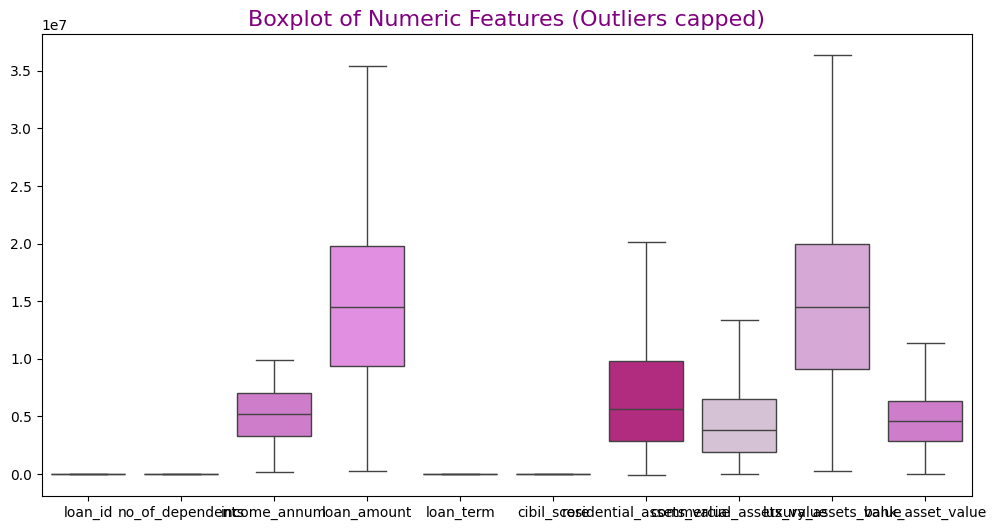

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_fill[numeric_cols], palette=["#D8BFD8", "#DDA0DD", "#DA70D6", "#EE82EE", "#FFC0CB", "#FF69B4", "#C71585"])
plt.title("Boxplot of Numeric Features (Outliers capped)", fontsize=16, color='#800080')
plt.show()



### I. Convert Text Data to Numerical
### Encode categorical text columns into numbers for machine learning.


In [10]:
from sklearn.preprocessing import LabelEncoder

text_cols = df_fill.select_dtypes(include=['object']).columns
print("Text columns for encoding:", list(text_cols))

le = LabelEncoder()
for col in text_cols:
    df_fill[col] = le.fit_transform(df_fill[col])

print("Dataset sample after encoding:")
print(df_fill.head())


Text columns for encoding: ['education', 'self_employed', 'loan_status']
Dataset sample after encoding:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0      1.0               2.0          0              0     9600000.0   
1      2.0               0.0          1              1     4100000.0   
2      3.0               3.0          0              1     9100000.0   
3      4.0               3.0          0              0     8200000.0   
4      5.0               5.0          1              1     9800000.0   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0   29900000.0       12.0        778.0                 2400000.0   
1   14500000.0        8.0        417.0                 2700000.0   
2   29700000.0       20.0        506.0                 7100000.0   
3   14500000.0        8.0        467.0                 5600000.0   
4   24200000.0       20.0        600.0                12400000.0   

   commercial_assets_value  luxury_assets_value  bank_

_____________________________________________________________________________________________
## **Final Check**
### Verify the dataset for any remaining issues.


In [11]:
print("Missing values check:")
print(df_fill.isnull().sum())

print("Final dataset shape:", df_fill.shape)

print("""
Summary:
- Duplicate columns and rows removed.
- Missing data handled.
- Outliers capped.
- Text data encoded.
- Dataset is clean and ready for analysis/modeling.
""")


Missing values check:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
Final dataset shape: (4269, 13)

Summary:
- Duplicate columns and rows removed.
- Missing data handled.
- Outliers capped.
- Text data encoded.
- Dataset is clean and ready for analysis/modeling.

